In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

In [91]:
#Load the Data:
df = pd.read_excel('1553768847_housing.xlsx')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [93]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [94]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [95]:
#check wheather there are any missing values or null
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [96]:
#2. Handle missing values :
df = df.fillna(df.mean())

<ipython-input-96-04e87d67d337>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [97]:
#3.Encode categorical data :
labelEncoder = LabelEncoder()
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])
df["ocean_proximity"].value_counts()
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


In [98]:
#4.Split the dataset : 
x = df.drop(["median_house_value"],axis=1)
print(x.head())
y = df["median_house_value"]
print("Medain Housing Values")
#print(y.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  
0         322         126         8.3252                3  
1        2401        1138         8.3014                3  
2         496         177         7.2574                3  
3         558         219         5.6431                3  
4         565         259         3.8462                3  
Medain Housing Values


In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [100]:
#5.Standardize data :
independent_scaler = StandardScaler()
x_train = independent_scaler.fit_transform(x_train)
x_test = independent_scaler.transform(x_test)
print(x_train)

print(x_test)

[[ 1.27258656 -1.3728112   0.34849025 ...  0.32290591 -0.326196
   2.00593172]
 [ 0.70916212 -0.87669601  1.61811813 ...  0.6720272  -0.03584338
   2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 ... -0.43046109  0.14470145
   2.00593172]
 ...
 [ 0.59946887 -0.75500738  0.58654547 ...  0.07090859 -0.49697313
  -0.81854604]
 [-1.18553953  0.90651045 -1.07984112 ...  0.15490769  0.96545045
  -0.81854604]
 [-1.41489815  0.99543676  1.85617335 ...  1.94776365 -0.68544764
   1.29981228]]
[[ 0.28534728  0.1951     -0.28632369 ... -0.37008673 -1.15508475
  -0.1124266 ]
 [ 0.06097472 -0.23549054  0.11043502 ...  0.220532   -0.70865905
  -0.1124266 ]
 [-1.42487026  1.00947776  1.85617335 ...  1.21539643 -0.21040155
   1.29981228]
 ...
 [-1.23041404  0.78014149 -0.28632369 ...  0.17853244  2.80902421
  -0.81854604]
 [-0.08860699  0.52740357  0.58654547 ... -0.06821494 -0.57542978
  -0.1124266 ]
 [ 0.60445493 -0.66608108 -0.92113763 ... -0.13646421 -0.17259111
  -0.81854604]]


In [101]:
#6.Perform Linear Regression : 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [102]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [103]:
print(lr_model.coef_)
print(lr_model.intercept_)

[-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]
207194.69373788778


In [104]:
preds_mod = lr_model.predict(x_test)
preds_mod

array([ 75616.18733782, 166419.13655163, 264751.07303087, ...,
       439690.1127737 , 130408.05181885, 175513.56755484])

In [105]:
print(sqrt(mean_squared_error(y_test,preds_mod)))

71098.69982050033


In [106]:
#7.Perform Decision Tree Regression :
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor()
model_dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [107]:
preds = model_dtr.predict(x_test)
preds

array([ 40900.,  57100., 500001., ..., 500001.,  67000., 160300.])

In [108]:
print(sqrt(mean_squared_error(y_test, preds)))

68232.21502234216


In [109]:
#8.Perform Random Forest Regression :
from sklearn.ensemble import RandomForestRegressor
model_rfg = RandomForestRegressor()
model_rfg.fit(x_train, y_train)

RandomForestRegressor()

In [110]:
preds_rfg = model_rfg.predict(x_test)
preds_rfg

array([ 51109.  ,  68304.  , 478586.55, ..., 497566.97,  69632.  ,
       170248.  ])

In [111]:
print(sqrt(mean_squared_error(y_test, preds_rfg)))

49851.31154986434


In [112]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [113]:
#9.Bonus exercise: Perform Linear Regression with one independent variable:
df_med = df['median_income']
df_med.head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

In [117]:
x_train2,x_test2, y_train2, y_test2 = train_test_split(df_med,y, test_size = 0.2, random_state = 42)

print('x_train2 shape {} and size {}'. format(x_train2.shape, x_train2.size))
print('x_test2 shape {} and size {}' . format(x_test2.shape, x_test2.size))
print('y_train2 shape {} and size {}' . format(y_train2.shape, y_train2.size))
print('y_test2 size {} and size {}'. format(y_test2.shape, y_test2.size))

x_train2 shape (16512,) and size 16512
x_test2 shape (4128,) and size 4128
y_train2 shape (16512,) and size 16512
y_test2 size (4128,) and size 4128


In [120]:
linreg = LinearRegression()
linreg.fit(x_train2.array.reshape(-1,1), y_train2.array.reshape(-1,1))
print(linreg.intercept_)
print(linreg.coef_)

[44459.72916908]
[[41933.84939381]]


In [123]:
preds_new = linreg.predict(x_test.array.reshape(-1,1))
preds_new

array([[114958.91676996],
       [150606.88213964],
       [190393.71844449],
       ...,
       [431500.77230409],
       [161245.49973085],
       [193412.95560084]])

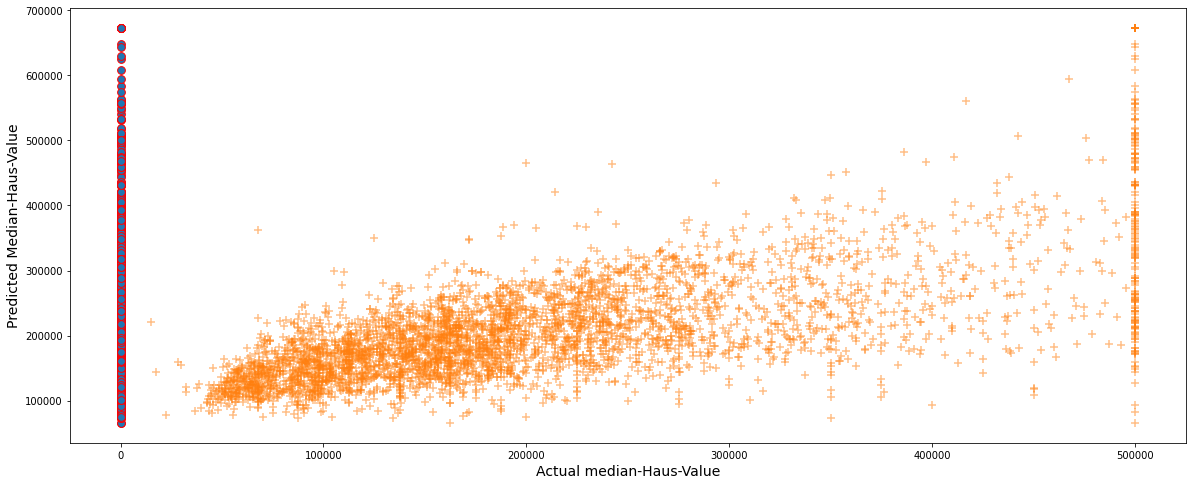

In [133]:
fig =plt.figure(figsize=(20, 8))
plt.scatter(x_test2.array.reshape(-1,1), preds_new, marker="o",edgecolors ="r",s=60)
plt.scatter(y_test2.array.reshape(-1,1), preds_new, marker="+",s=50,alpha=0.5)
plt.xlabel('Actual median-Haus-Value', fontsize= 14)
plt.ylabel('Predicted Median-Haus-Value', fontsize = 14)
plt.show();